### Notebook to calculate NDSI in PlanetScope 4-band imagery
Rainey Aberle

Last edited: January 2022

In [1]:
# Import packages
import os
import glob
import numpy as np
import geopandas as gpd
import rasterio as rio
from rasterio.mask import mask
from rasterio.plot import show
import earthpy.spatial as es
import matplotlib
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from shapely.geometry import shape

# base directory
basepath = '/Users/raineyaberle/Research/PhD/Wolverine/'
# image directory
impath = basepath+'imagery/Planet/2021-04-20_2021-08-25/SR-stitched/'
# output folder
outpath = basepath+'figures/SCA/'

In [2]:
### Area of Interest (AOI) ###
# Read in shapefile with AOI polygon
fn = basepath+'GIS_data/wolverine_RGI.shp'
#fn = basepath+'GIS_data/USGS/wolverine_boundary/Wolverine_Glacier_Boundaries.shp'
AOI = gpd.read_file(fn)
print('Original shapefile CRS:',AOI.crs)

# Reproject to imagery CRS if necessary
AOI = AOI.to_crs(32606)

# print information
print('Reprojected shapefile CRS: ',AOI.crs)
print('Shapefile bounds:',AOI.boundary)

Original shapefile CRS: epsg:4326
Reprojected shapefile CRS:  epsg:32606
Shapefile bounds: 0    MULTILINESTRING ((393342.531 6698475.452, 3933...
dtype: geometry


In [3]:
### Load images ###
os.chdir(impath) # change directory
im_names = glob.glob('*.tif') # load all .tif file names
im_names.sort() # sort file names by date
print(im_names)

['20210421.tif', '20210423.tif', '20210425.tif', '20210426.tif', '20210501.tif', '20210507.tif', '20210517.tif', '20210518.tif', '20210524.tif', '20210605.tif', '20210606.tif', '20210611.tif', '20210612.tif', '20210613.tif', '20210614.tif', '20210615.tif', '20210629.tif', '20210630.tif', '20210701.tif', '20210704.tif', '20210715.tif', '20210716.tif', '20210717.tif', '20210718.tif', '20210719.tif', '20210726.tif', '20210731.tif', '20210801.tif', '20210802.tif', '20210813.tif', '20210815.tif', '20210816.tif', '20210818.tif', '20210821.tif']


In [4]:
### Crop images to AOI ###

# create folder for cropped images 
cropped_path = impath+'cropped/'
if os.path.isdir(cropped_path)==0:
    os.mkdir(cropped_path)
    print(cropped_path+' directory made')

# loop through images
for im_name in im_names:
    
    # open image
    im = rio.open(im_name)    

    # extract date from image name
    date = im_name[0:8]
    
    # mask image pixels outside the AOI
    AOI_bb = [AOI.bounds]
    out_image, out_transform = mask(im, list(AOI.geometry), crop=True)
    out_meta = im.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    with rio.open(cropped_path+date+'_crop.tif', "w", **out_meta) as dest:
        dest.write(out_image)
    
    print(date+'_crop.tif saved')

20210421_crop.tif saved
20210423_crop.tif saved
20210425_crop.tif saved
20210426_crop.tif saved
20210501_crop.tif saved
20210507_crop.tif saved
20210517_crop.tif saved
20210518_crop.tif saved
20210524_crop.tif saved
20210605_crop.tif saved
20210606_crop.tif saved
20210611_crop.tif saved
20210612_crop.tif saved
20210613_crop.tif saved
20210614_crop.tif saved
20210615_crop.tif saved
20210629_crop.tif saved
20210630_crop.tif saved
20210701_crop.tif saved
20210704_crop.tif saved
20210715_crop.tif saved
20210716_crop.tif saved
20210717_crop.tif saved
20210718_crop.tif saved
20210719_crop.tif saved
20210726_crop.tif saved
20210731_crop.tif saved
20210801_crop.tif saved
20210802_crop.tif saved
20210813_crop.tif saved
20210815_crop.tif saved
20210816_crop.tif saved
20210818_crop.tif saved
20210821_crop.tif saved


Area of snow =  1459.6812  km^2


/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


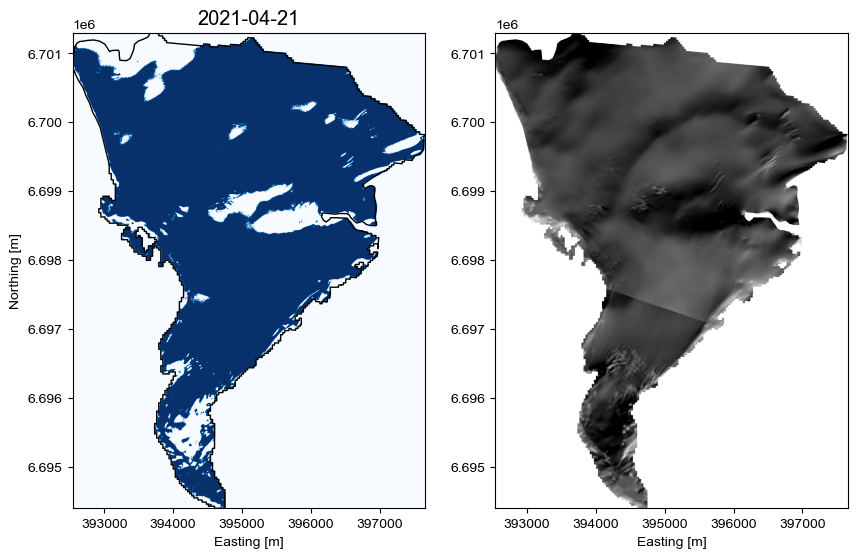

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1377.0837  km^2


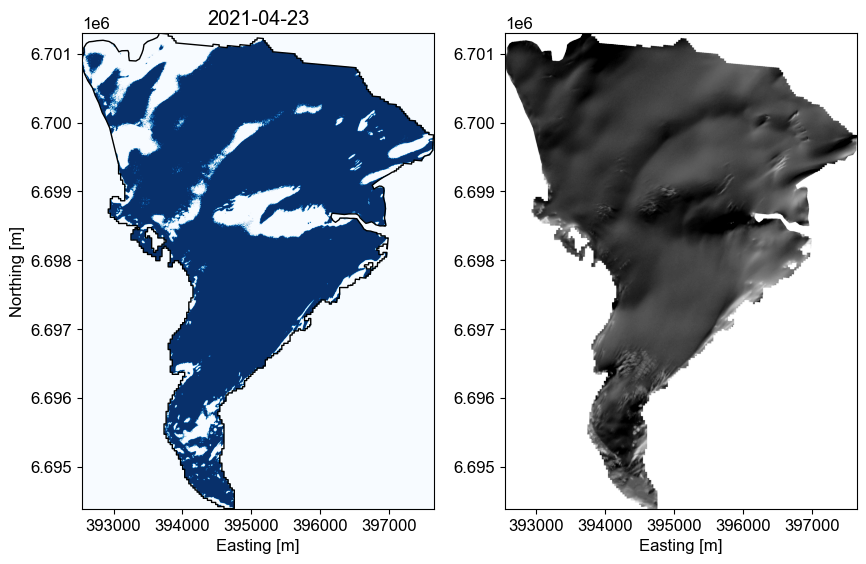

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1276.8579  km^2


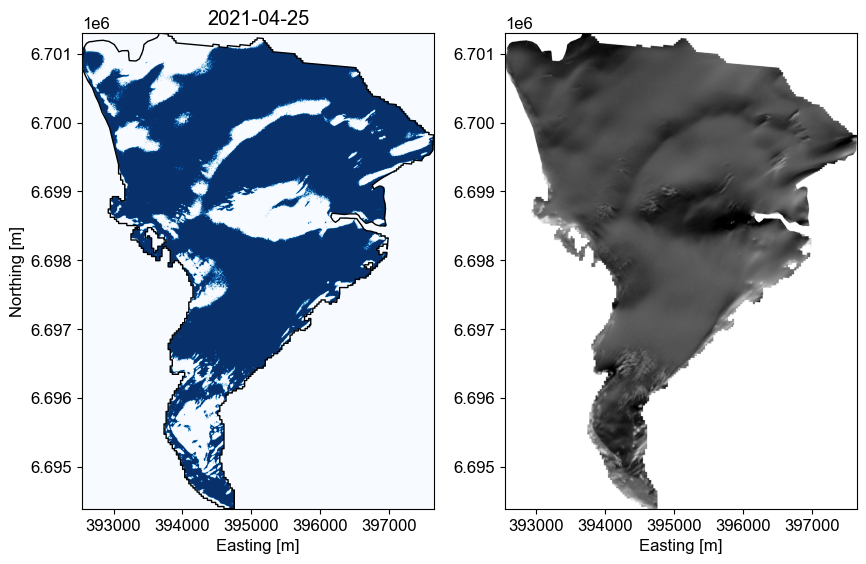

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1660.0599  km^2


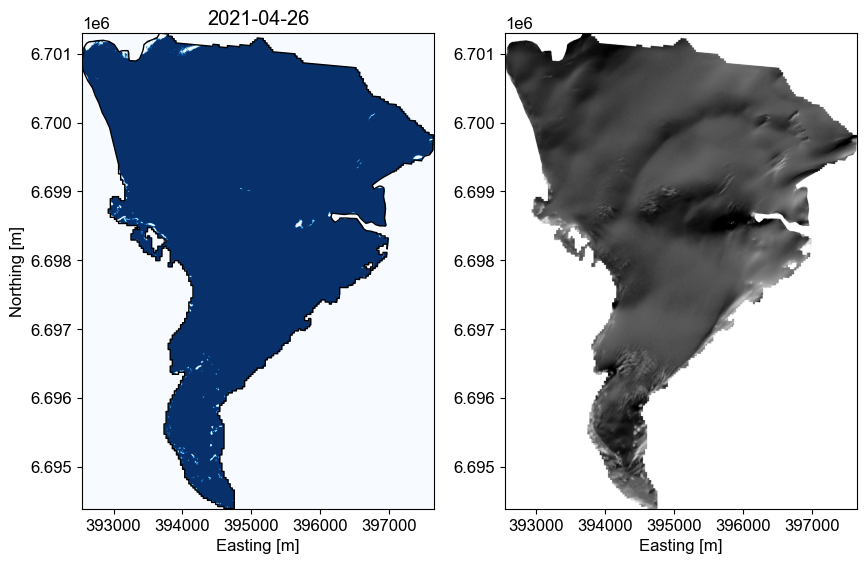

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1654.3026  km^2


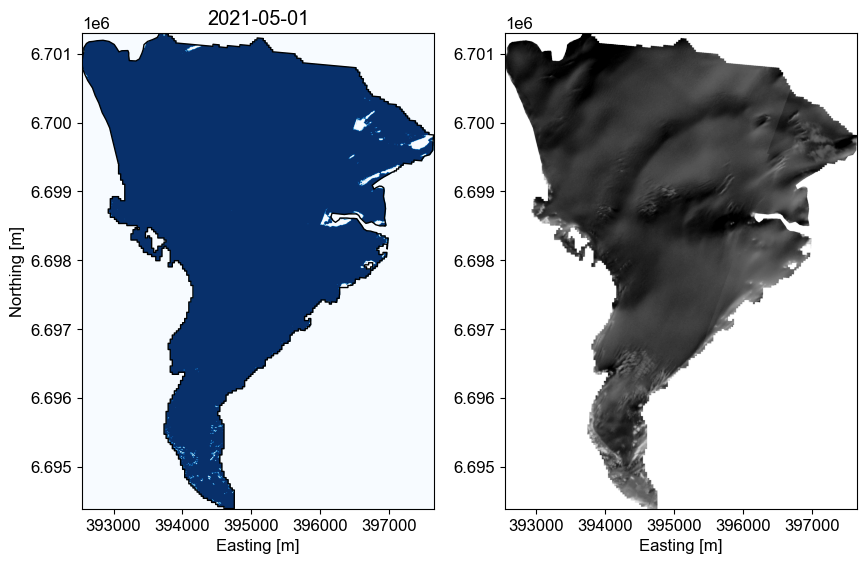

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1631.4435  km^2


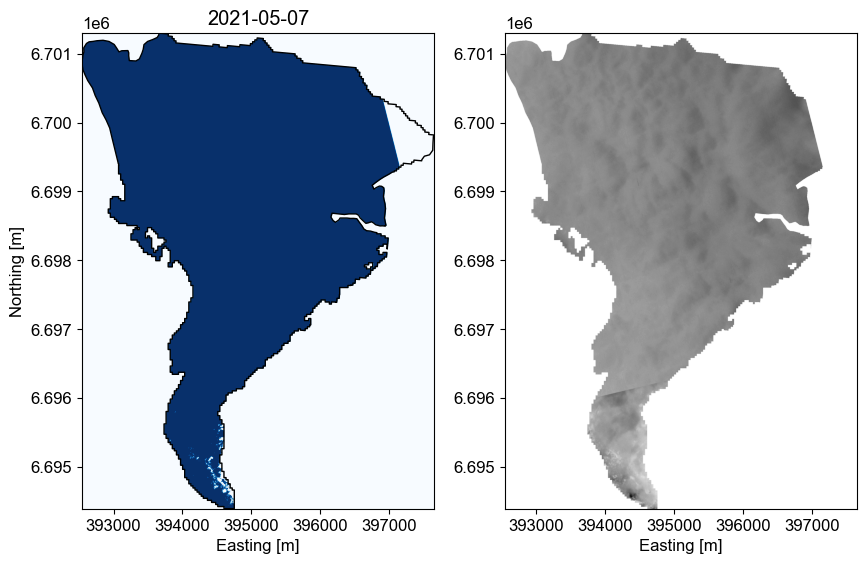

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1086.1731  km^2


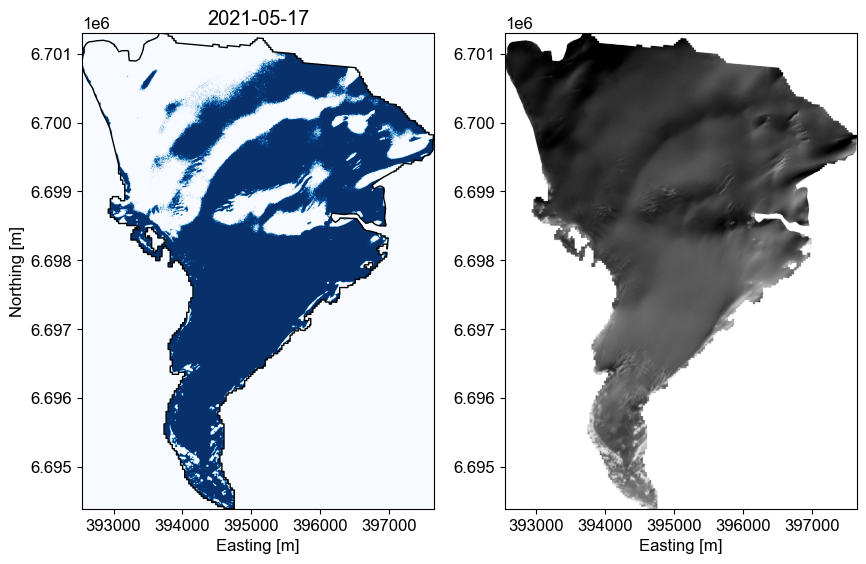

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1660.8222  km^2


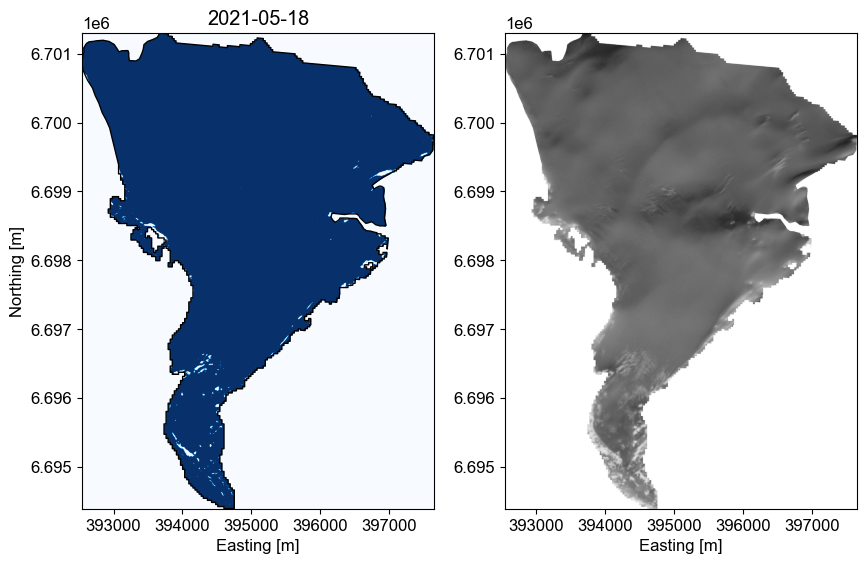

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1452.1275  km^2


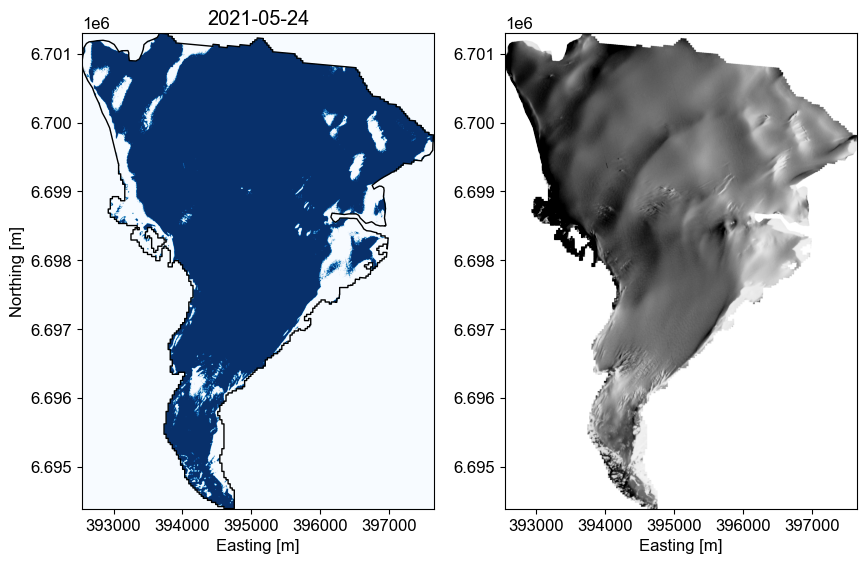

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1615.3083  km^2


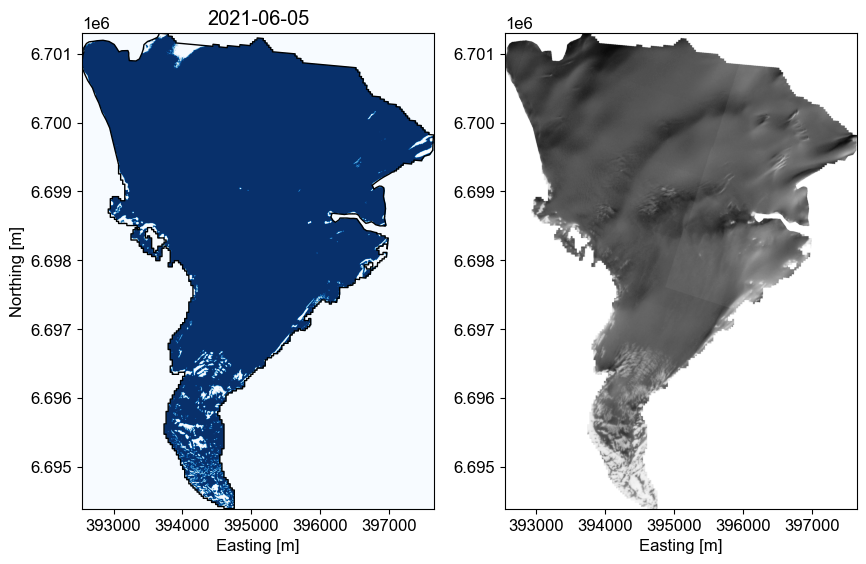

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1318.6458  km^2


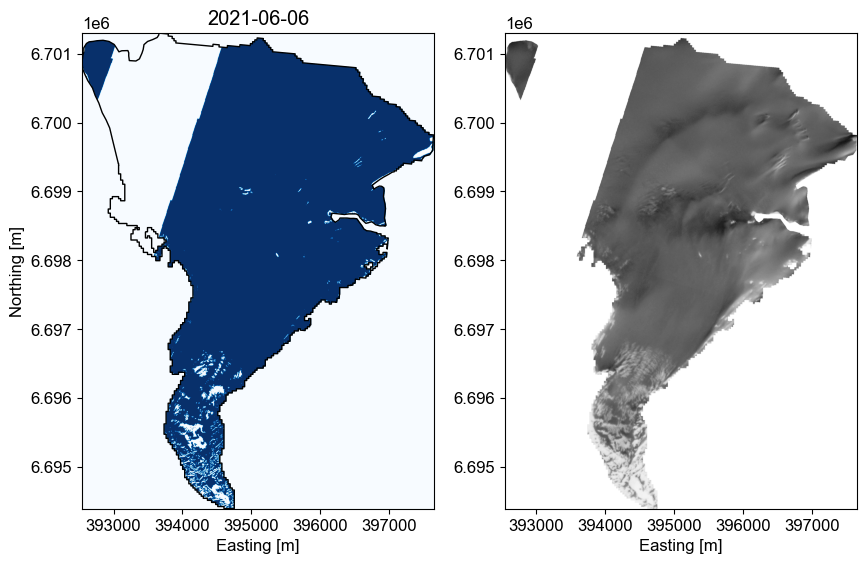

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1661.9688  km^2


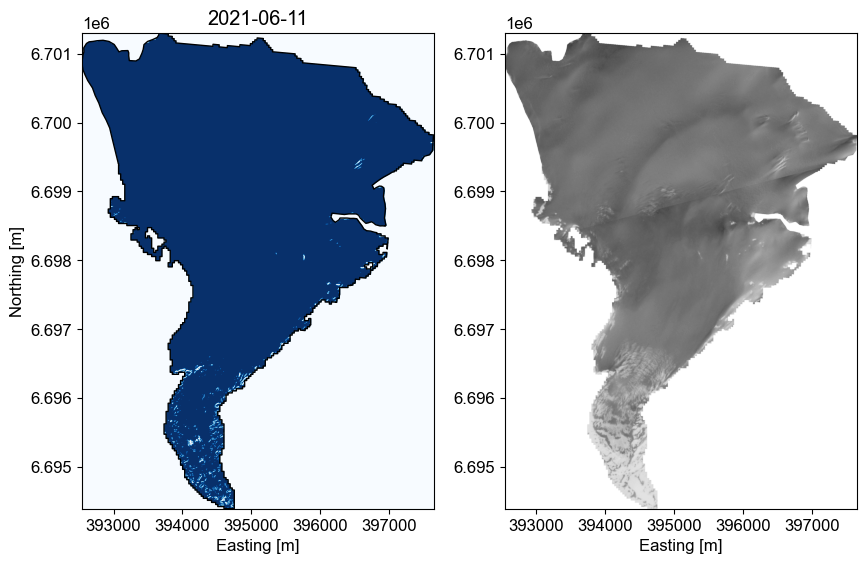

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1037.322  km^2


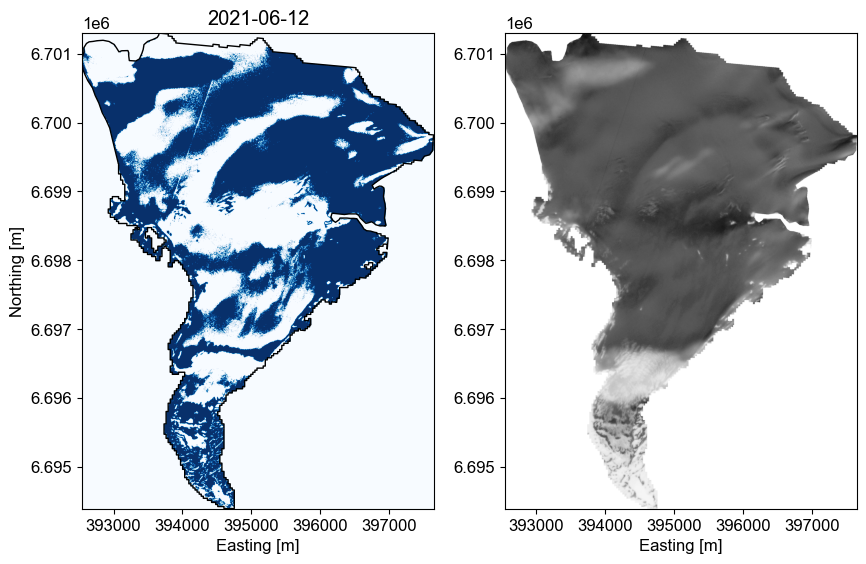

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1077.2703  km^2


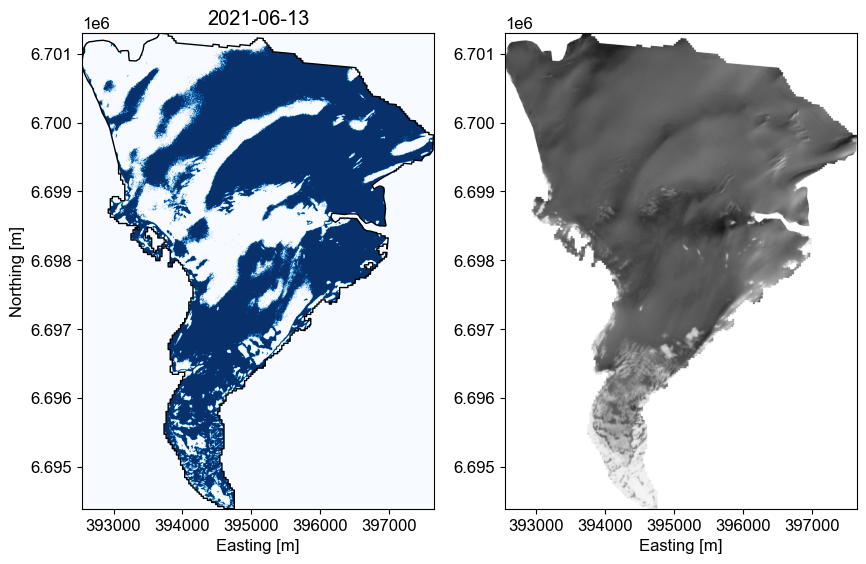

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1460.3598  km^2


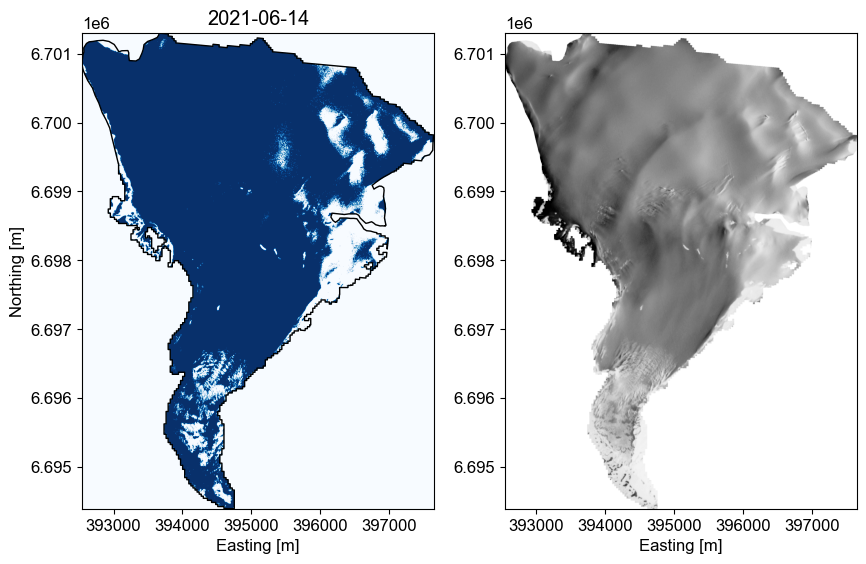

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1502.0847  km^2


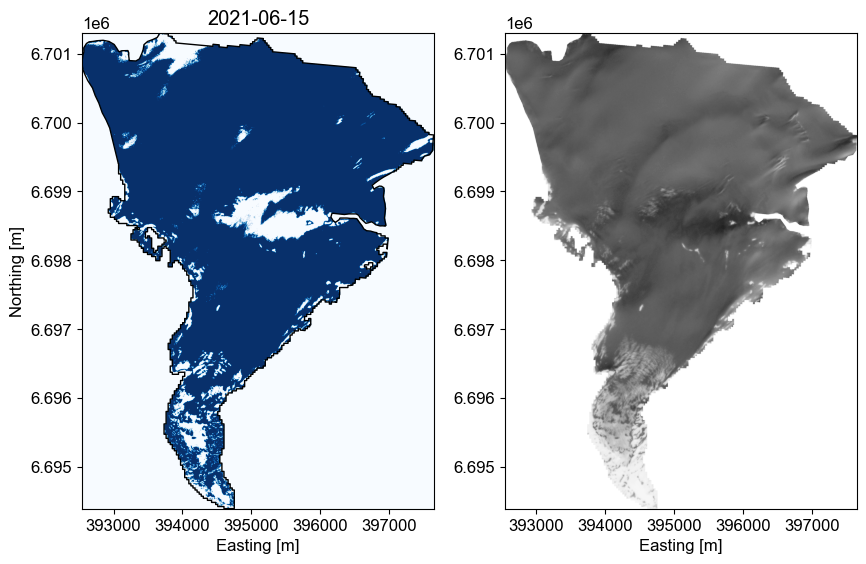

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1074.1941  km^2


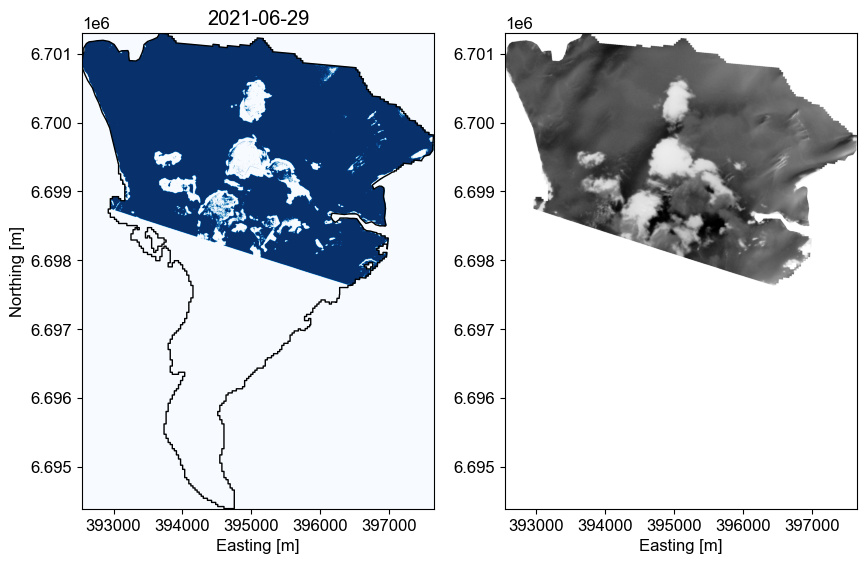

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  134.3034  km^2


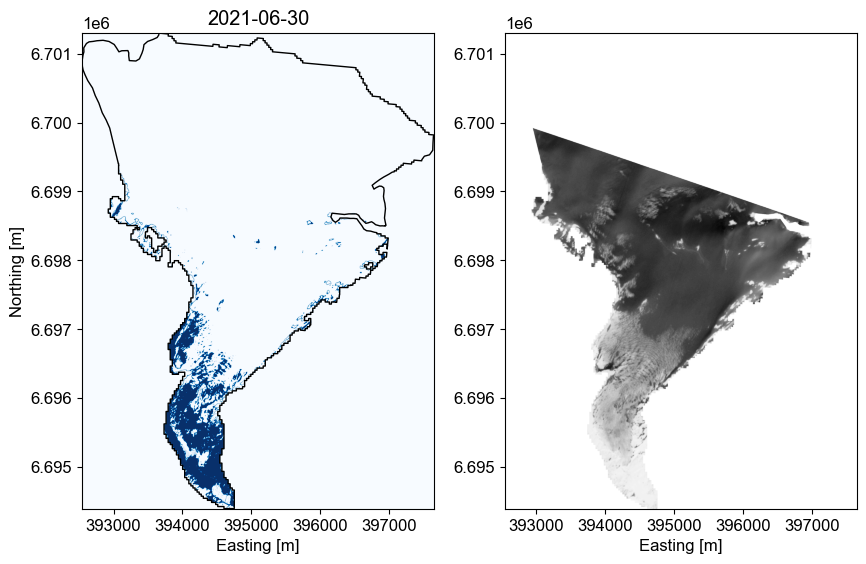

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1661.9994  km^2


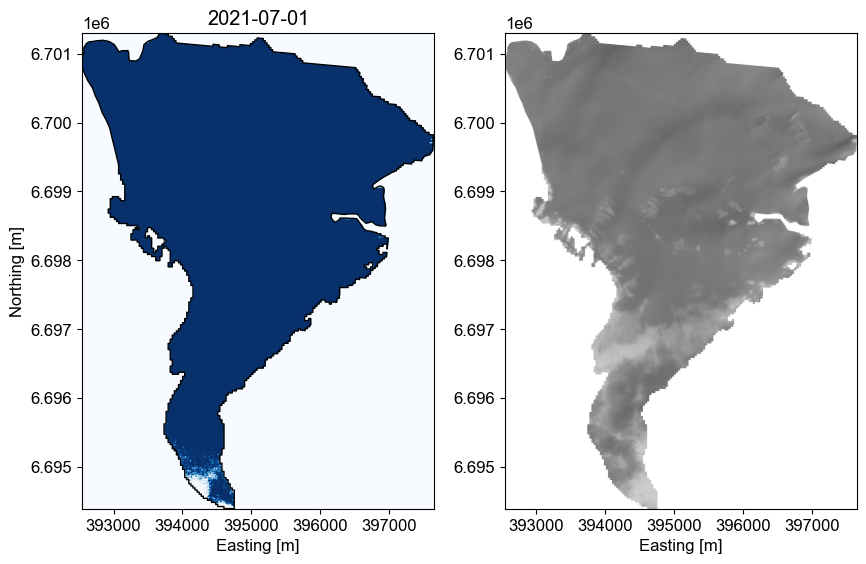

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  315.2628  km^2


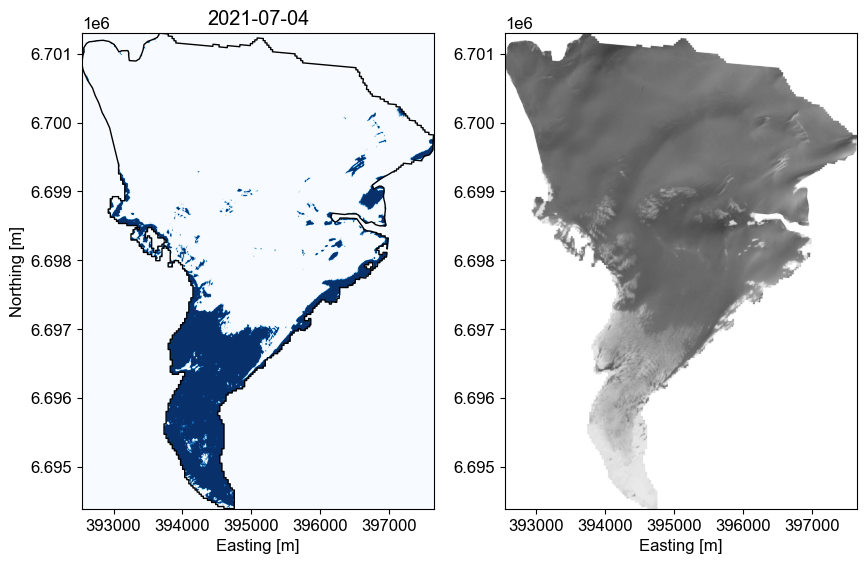

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  336.1185  km^2


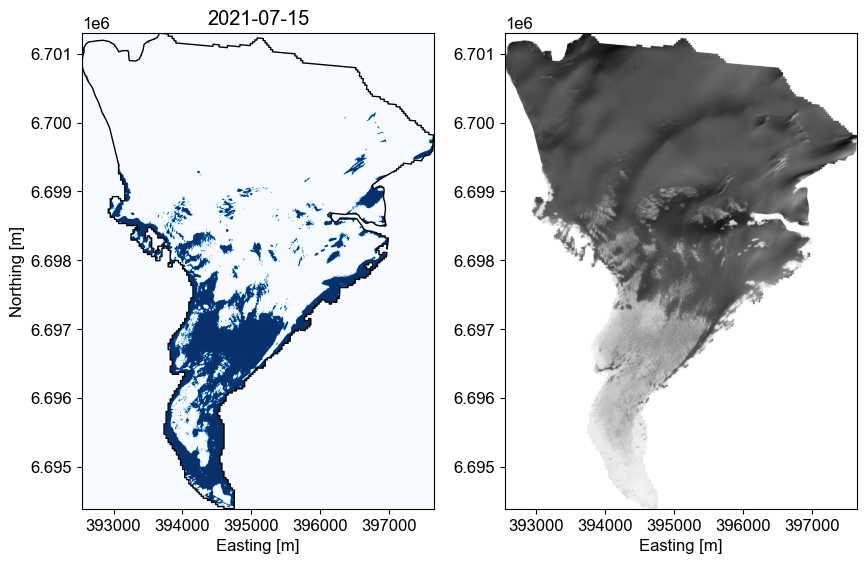

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1262.5164  km^2


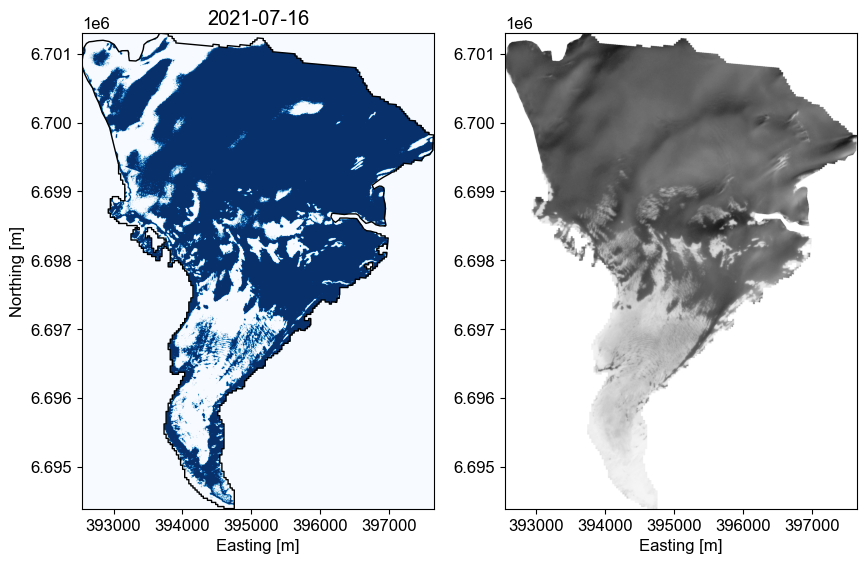

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  0.4941  km^2


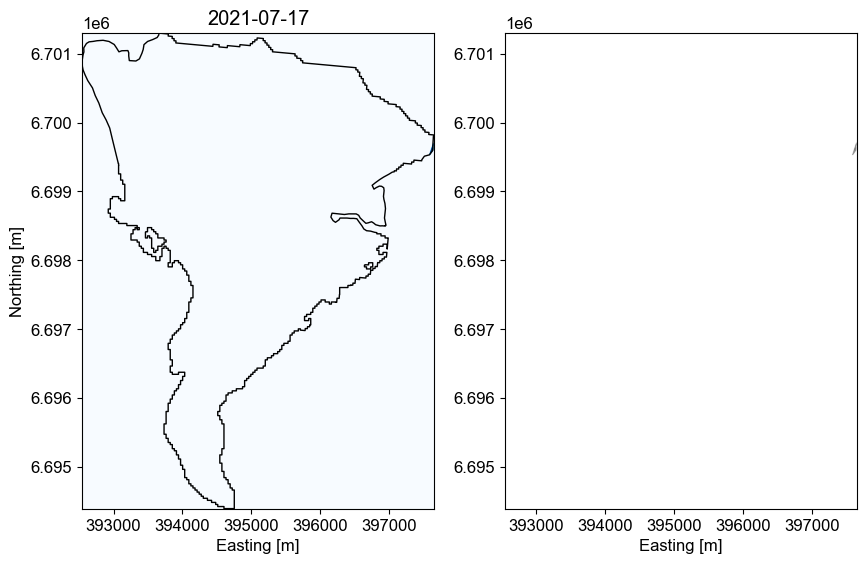

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  691.0776  km^2


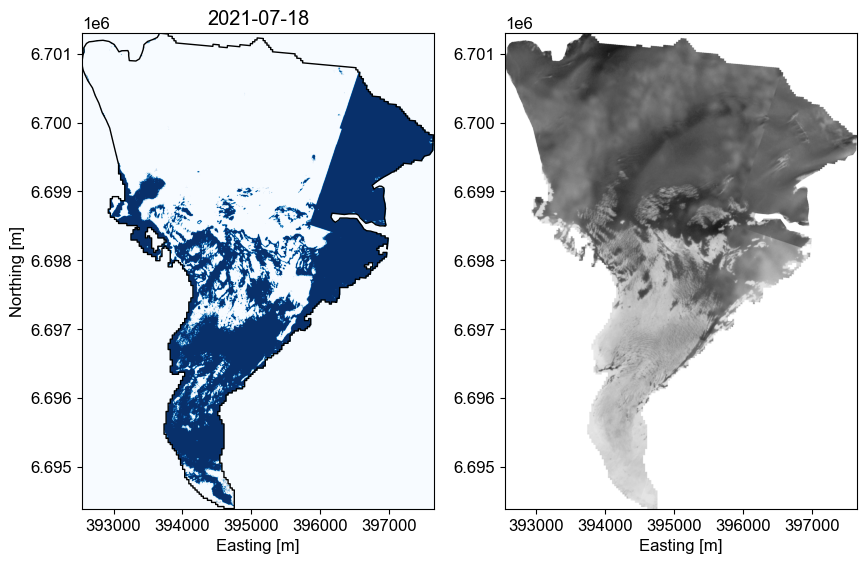

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1627.3233  km^2


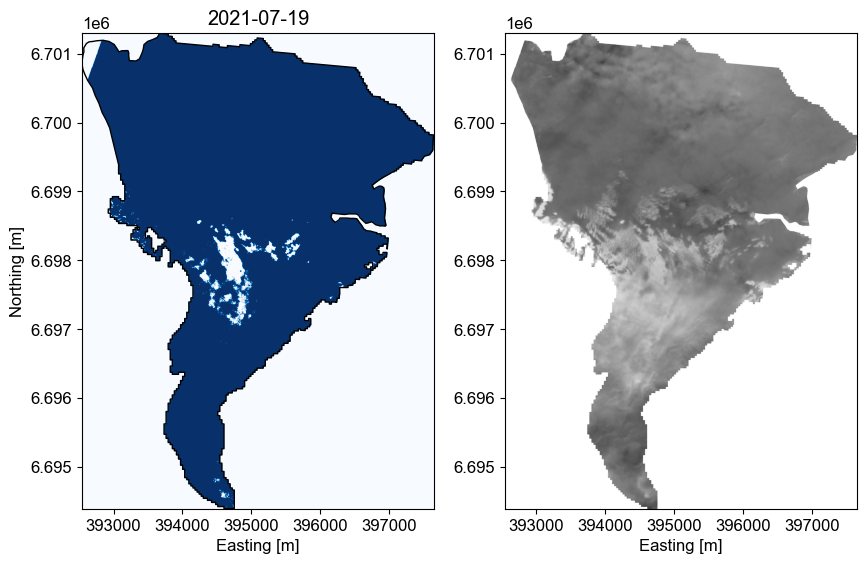

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  990.9261  km^2


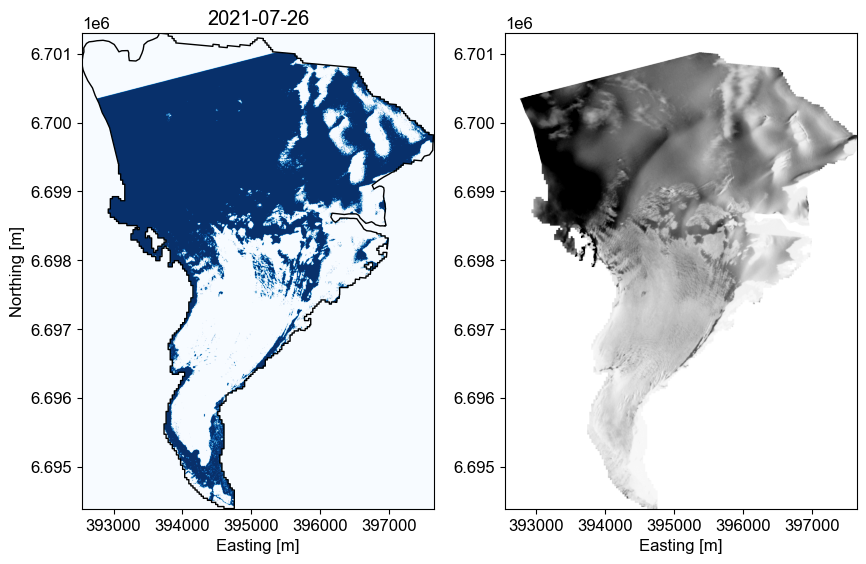

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  621.5643  km^2


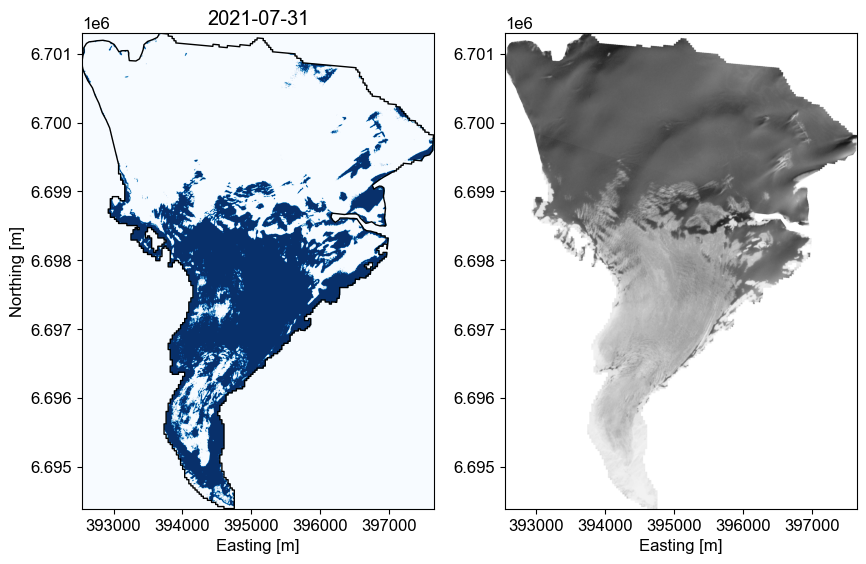

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1493.8452  km^2


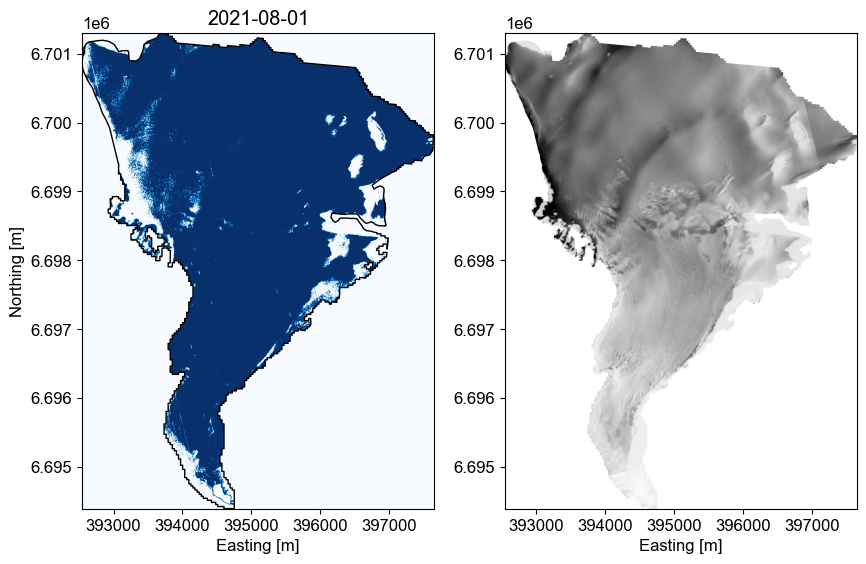

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  677.9529  km^2


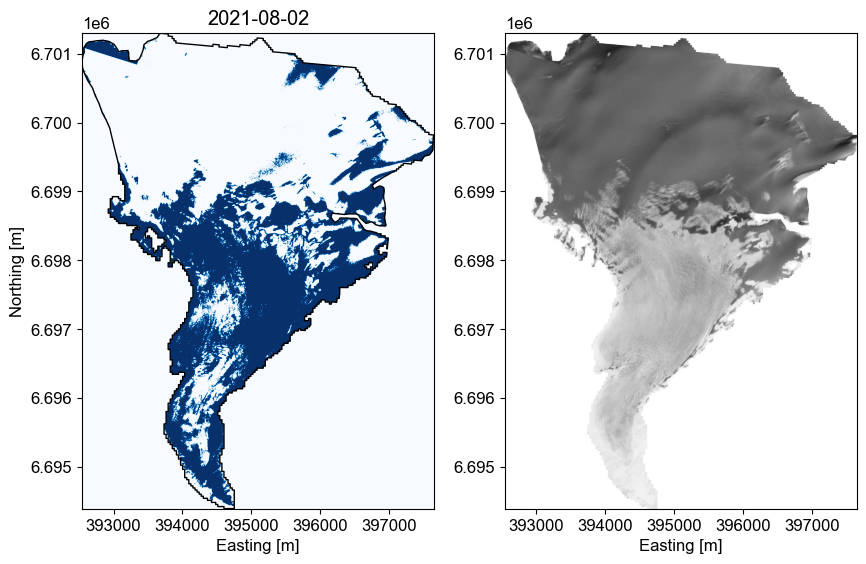

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  0.0  km^2


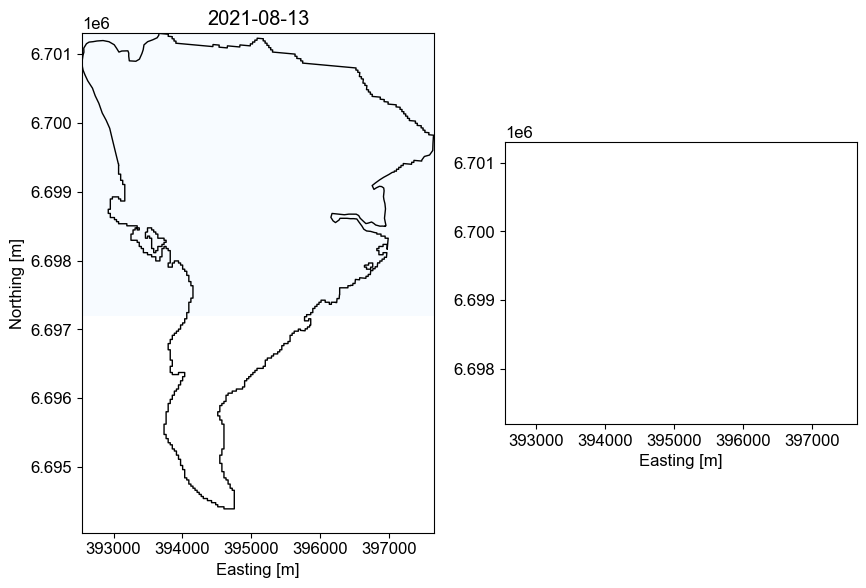

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1653.2442  km^2


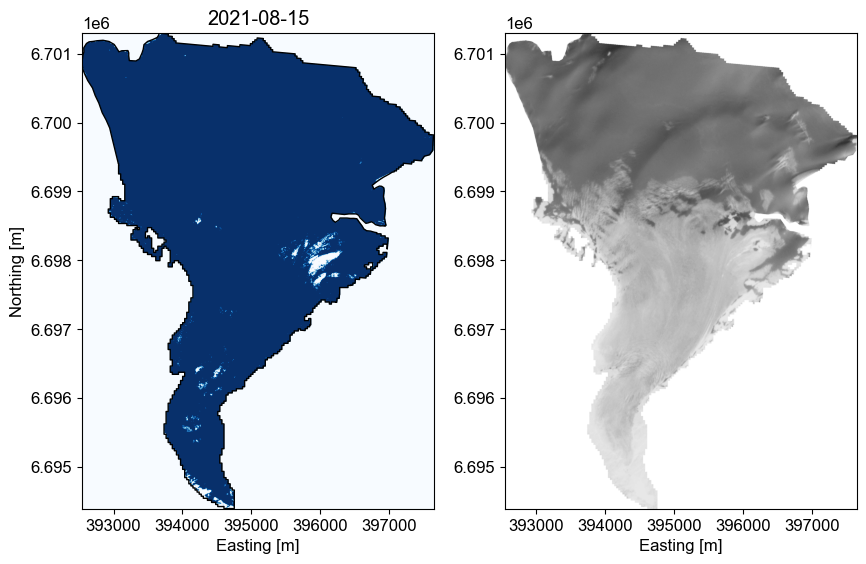

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  173.8278  km^2


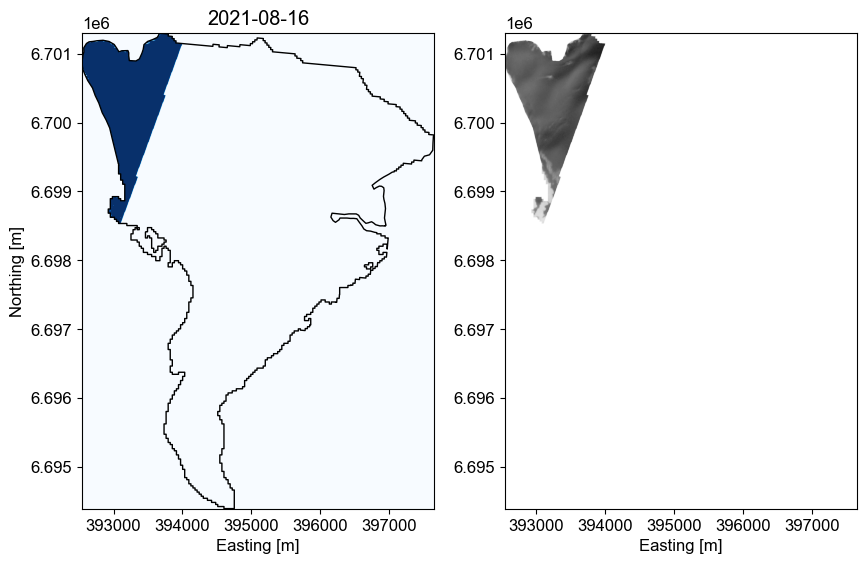

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  713.0421  km^2


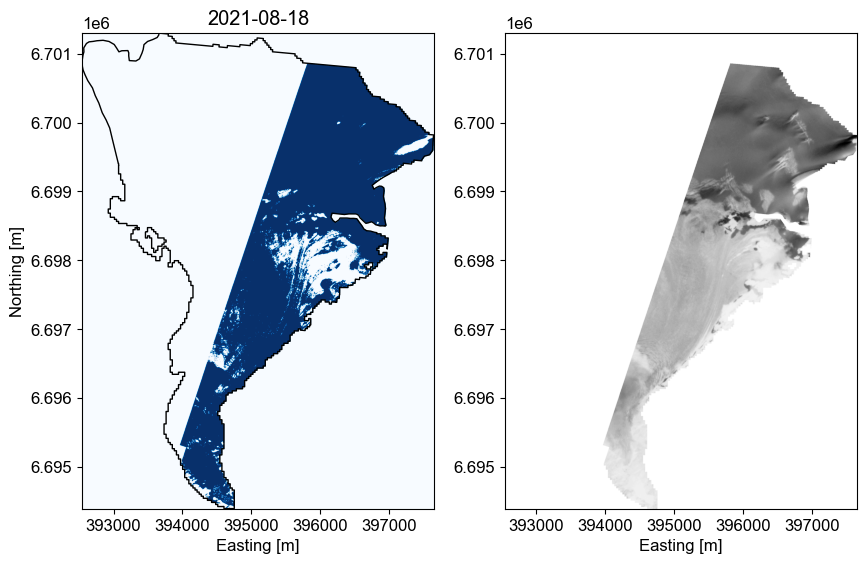

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


Area of snow =  1362.8286  km^2


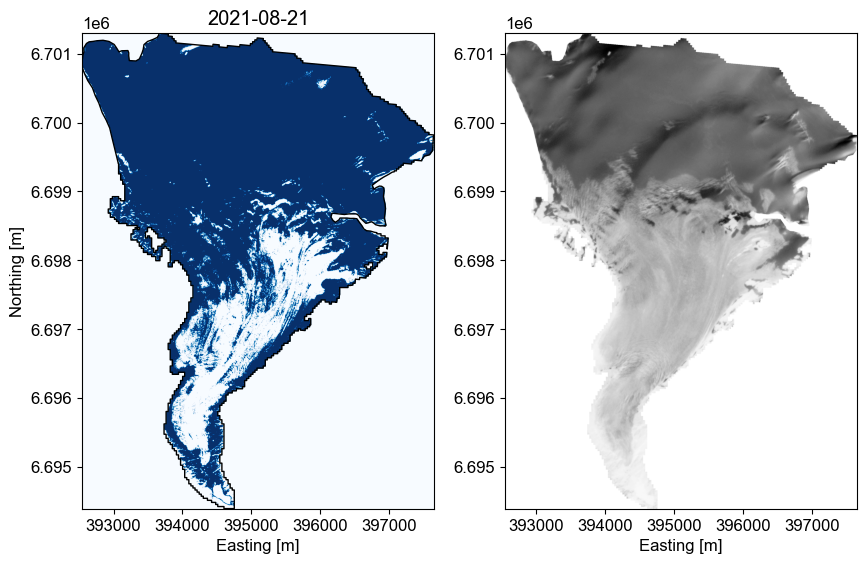

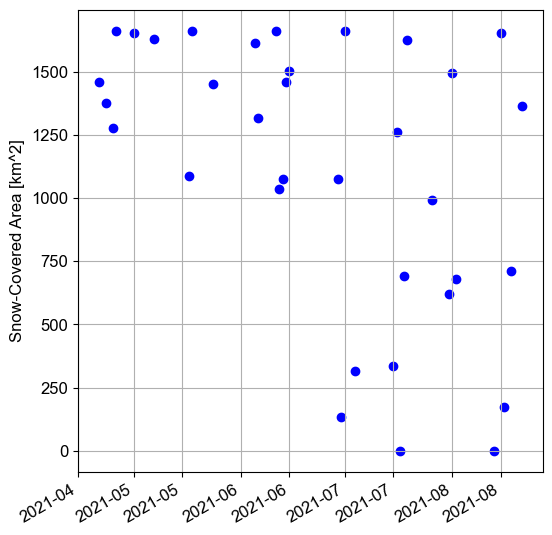

In [5]:
### Calculate NDSI and Snow-Covered Area ###

# grab cropped image names
cropped_path = impath+'cropped/'
os.chdir(cropped_path) # change directory
im_names_crop = glob.glob('*_crop.tif')
im_names_crop.sort() # sort file names by date

# loop through cropped images
dates=[]
snow_areas=[]
for im_name in im_names_crop:
    
    # open image
    im = rio.open(im_name)

    # extract date from image name
    date = im_name[0:4] + '-' + im_name[4:6] + '-' + im_name[6:8]
    dates = dates + [np.datetime64(date)]

    # calculate area of snow 
    # define bands, convert to TOA reflectance
    scalar = float(10000)  # scalar multiplier
    blue = im.read(1).astype(float) / scalar
    green = im.read(2).astype(float) / scalar
    red = im.read(3).astype(float) / scalar
    nir = im.read(4).astype(float) / scalar
    # compute NDSI
    ndsi = es.normalized_diff(green, nir) 
    
    # sample coords at point
#     s_coords = [395149.49914716935,6700312.229950106]
#     s_rv = im.sample(s_coords)
#     s_ndsi = es.normalized_diff(s_rv[1].astype(float)/scalar, s_rv[3].astype(float)/scalar)
    
    # determine thresholds 
    thresh_min = -0.05
    thresh_max = 0.2

    # threshold NDSI to determine snow cover
    snow = np.where((ndsi>thresh_min) & (ndsi<thresh_max),1,0)
    
    # calculate total area of snow
    pA = im.res[0]*im.res[1] # pixel area [m^2]
    snow_count = np.count_nonzero(snow) # number of snow pixels
    snow_area = pA * snow_count /10e3 # area of snow [km^2]
    snow_areas = snow_areas + [snow_area]
    print('Area of snow = ',snow_area,' km^2')
    
    # plot 
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
    plt.rcParams.update({'font.size': 12, 'font.sans-serif': 'Arial'})
    # NDSI
    ax1.set_title(date)
    show(snow, transform=im.transform, cmap='Blues', clim=(0,1), ax=ax1)
    AOI.plot(ax=ax1,facecolor='none',edgecolor='black')
    ax1.set_xlabel('Easting [m]')
    ax1.set_ylabel('Northing [m]')
    # NIR band
    show(nir, transform=im.transform, cmap='Greys', clim=(0,1), ax=ax2)
    ax2.set_xlabel('Easting [m]')
    plt.show()
    
    # save image
    fig.savefig(outpath+date+'_SCA.png')

# plot snow-covered area by date
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.rc('font', size=14) 
plt.scatter(dates,snow_areas,color='blue')
plt.grid()
plt.ylabel('Snow-Covered Area [km^2]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Rotate and right-align the x-tick labels
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()

# save figure
#fig.savefig(outpath+str(np.min(dates))+'_'+str(np.max(dates))+'_SCA.png') 

In [6]:
### Plot figure ###

## image ##
os.chdir(impath) # change directory
im_name = glob.glob('20210611.tif')
im = rio.open(im_name[0])

## snow ##
# load cropped image
im_name_crop = glob.glob(cropped_path+'20210611_crop.tif')
im_crop = rio.open(im_name_crop[0])
# define bands
red = im_crop.read(3) / scalar
nir = im_crop.read(4) / scalar
# compute NDSI
ndsi = calculate_ndsi(nir,red) 
# threshold NDSI to determine snow cover
snow = np.where((ndsi>thresh_min) & (ndsi<thresh_max),1,np.nan)

# snowline
sl_fn = basepath+'GIS_data/digitized_snowline_picks/20210611_snowline.shp'
sl = gpd.read_file(sl_fn) # snowline
# Reproject to imagery CRS if necessary
sl = sl.to_crs(32606)

# transect 
ts_fn = basepath+'GIS_data/digitized_snowline_picks/transect.shp'
ts = gpd.read_file(ts_fn) # snowline
# Reproject to imagery CRS if necessary
ts = ts.to_crs(32606)
# extract points from geometry
ts_pts = [i for i in ts.geometry]
ts_x,ts_y = ts_pts[0].coords.xy
ts_coords = np.dstack((ts_x,ts_y)).tolist()
# sample raster values at coordinates
ts_rv = [x for x in im.sample(ts_coords[0])]
# calculate NDSI at points
ts_ndsi=[]
for s in ts_rv:
    ts_ndsi = ts_ndsi + [calculate_ndsi(s[3]/scalar,s[1]/scalar)]
    
# plot
fig = plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14, 'font.sans-serif': 'Arial'})
# ax1
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Easting [m]')
ax1.set_ylabel('Northing [m]')
show(im.read(4), ax=ax1, transform=im.transform, cmap='Greys', label='NIR')
show(snow, ax=ax1, transform=im_crop.transform, cmap='Blues', clim=(0.5,1.2), label='snow')
AOI.plot(ax=ax1,facecolor='none',edgecolor='black', label='Glacier Outline')
sl.plot(ax=ax1, edgecolor='maroon', label='Snowline')
ax1.scatter(ts_x, ts_y, color='blue', label='Transect')
ax1.legend()
# Rotate and right-align the x-tick labels
for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
# ax2
ax2 = plt.subplot(2,2,2)
ax2.plot(dates,snow_areas,'.-k',markersize=15)
I = np.where(dates==np.datetime64('2021-06-11'))[0][0]
ax2.plot(dates[I], snow_areas[I],'*m',markersize=18)
ax2.grid()
ax2.set_ylabel('Snow-Covered Area [km$^2$]')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Rotate and right-align the x-tick labels
for label in ax2.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
# ax3
ax3 = plt.subplot(2,2,4)
ax3.set_xlim(np.min(ts_y)-2e2, np.max(ts_y)+2e2)
rect=matplotlib.patches.Rectangle((ax3.get_xlim()[0],thresh_min),ax3.get_xlim()[1]-ax3.get_xlim()[0],
                                  thresh_max-thresh_min, fill=True, color="grey", alpha=0.2, label='threshold')
plt.gca().add_patch(rect)
ax3.scatter(ts_y, ts_ndsi, color='blue', label='Transect')
ax3.set_xlabel('Northing [m]')
ax3.set_ylabel('NDSI')
# Rotate and right-align the x-tick labels
for label in ax3.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax3.grid()
ax3.legend()
# add panel labels (a-c)
ax1.text(ax1.get_xlim()[0] + (ax1.get_xlim()[1] - ax1.get_xlim()[0])*0.05,
         ax1.get_ylim()[0] + (ax1.get_ylim()[1] - ax1.get_ylim()[0])*0.08,'a',
        fontsize=18, fontweight='bold')
ax2.text(ax2.get_xlim()[0] + (ax2.get_xlim()[1] - ax2.get_xlim()[0])*0.05,
         ax2.get_ylim()[0] + (ax2.get_ylim()[1] - ax2.get_ylim()[0])*0.08,'b',
        fontsize=18, fontweight='bold')
ax3.text(ax3.get_xlim()[0] + (ax3.get_xlim()[1] - ax3.get_xlim()[0])*0.05,
         ax3.get_ylim()[0] + (ax3.get_ylim()[1] - ax3.get_ylim()[0])*0.08,'c',
        fontsize=18, fontweight='bold')
plt.show()

# save figure
# fig.savefig(outpath+'SCA_threshold.png')
# print('figure saved.')

NameError: name 'calculate_ndsi' is not defined